## ***9.DATA TRANSFORMATION***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder


In [2]:
data=pd.read_csv("adult_with_headers.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.isna().sum()
#no null values no need for deletion or imputation

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
data.duplicated().sum()

np.int64(24)

In [7]:
data.drop(data[data.duplicated()].index, inplace=True)
#dropping the duplicated rows

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

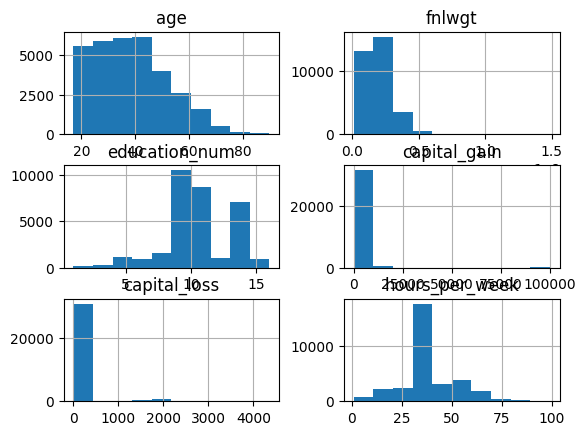

In [8]:
data.hist()

<Axes: >

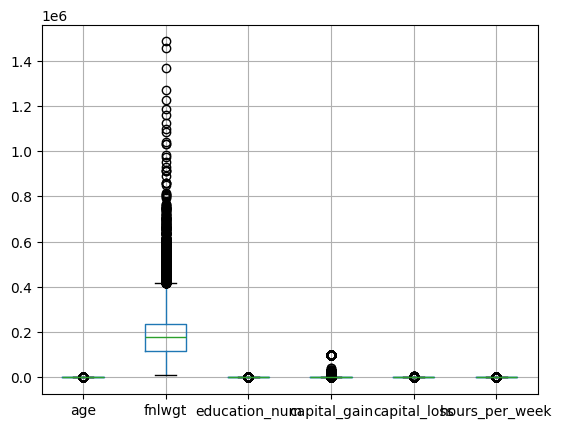

In [9]:
data.boxplot()

In [10]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [11]:
data.select_dtypes(include='object').columns.unique()

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [12]:
data1=data.copy()

In [13]:
for col in data.select_dtypes(include='object').columns:
  print(f"Unique values in '{col}':")
  print(data[col].unique())
  print(data[col].nunique())

Unique values in 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
9
Unique values in 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16
Unique values in 'marital_status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
7
Unique values in 'occupation':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
15
Unique values in 'relationship':
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6
Unique values in 'race':
[' White' ' Black' ' Asian-

In [14]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(data[['sex']]).toarray().astype('int')
#applying onehotencoder for categorical column with less than 5 categories

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [15]:
lab=LabelEncoder()
categorical_cols = ['income', 'native_country', 'sex', 'race', 'relationship', 'occupation', 'education', 'marital_status', 'workclass']
for col in categorical_cols:
    data[col] = lab.fit_transform(data[col])

In [16]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


LABELENCODER

PROS
Memory Efficient: Uses a single column to represent categories, making it more memory-efficient than one-hot encoding.

Introduces False
Ordinality: Assigns an artificial numerical order to categories, which can mislead models that assume a meaningful relationship between the numbers (e.g., 3 is greater than 2).

Fast and Simple: It is quick to implement and is generally faster for training.

Works Well with Tree-Based Models: Algorithms like decision trees can handle the integer representation.

Suitable for Ordinal Data: Works well for data with a natural order, like "low," "medium," and "high".

CONS

Introduces False
Ordinality: Assigns an artificial numerical order to categories, which can mislead models that assume a meaningful relationship between the numbers (e.g., 3 is greater than 2).

Problematic for Distance-Based Models: Can distort distance metrics in models like K-Nearest Neighbors (KNN).

Not Suitable for Nominal Data: Can lead to biased predictions if used on non-ordinal data where no such order exists.



ONEHOTENCODER

 PROS of one-hot encoding
- No implicit ordering: treats categories as independent binary flags, safe for nominal variables.
- Model-agnostic: works well with linear models, distance-based methods, neural nets, and tree models without introducing artificial ordinality.
- Interpretable coefficients: in linear/logistic models, coefficients relate directly to presence/absence of a category (relative to omitted base).

 CONS of one-hot encoding
- Dimensionality explosion: for high-cardinality features, feature space grows by number of categories (can harm performance, memory, and increase risk of overfitting).
- Sparsity: creates many sparse columns; may require sparse storage and models that handle sparse input efficiently.
- Multicollinearity: including all one-hot columns causes linear dependence; typically one category must be dropped (reference level) for linear models.
- Loss of compactness for ordinal variables unless you explicitly encode order differently.

<Axes: >

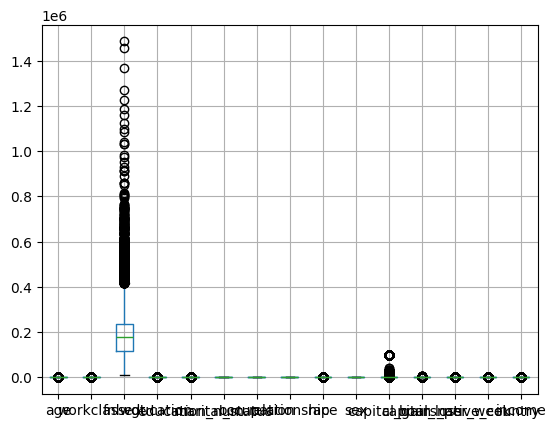

In [17]:
data.boxplot()

In [18]:
def outlier_capping(data,column):
 Q1=data[column].quantile(0.25)
 Q3=data[column].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 data[column]=data[column].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in data.select_dtypes(["int","float"]).columns:
 outlier_capping(data,col)

<Axes: >

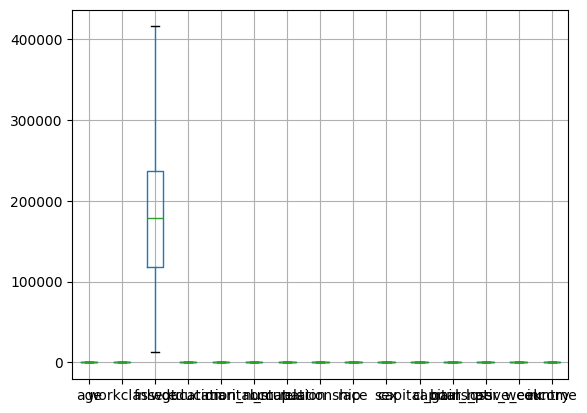

In [19]:
data.boxplot()

In [21]:
lab_data1 = LabelEncoder()
categorical_cols = ['income', 'native_country', 'sex', 'race', 'relationship', 'occupation', 'education', 'marital_status', 'workclass']
for col in categorical_cols:
    data1[col] = lab_data1.fit_transform(data1[col])

display(data1.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


<Axes: >

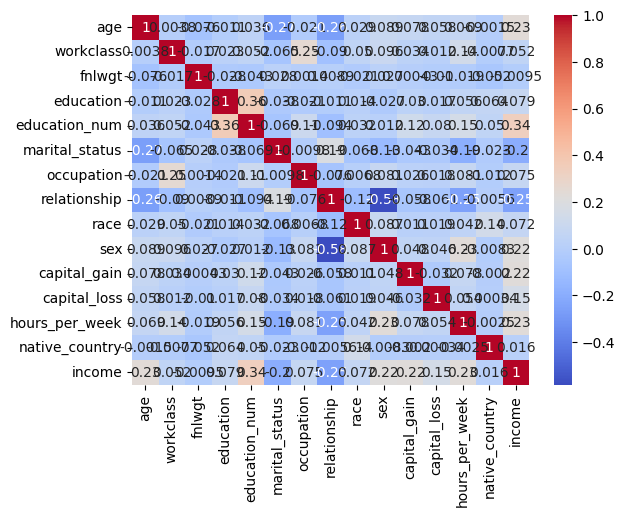

In [22]:
sns.heatmap(data1.corr(),annot=True,cmap='coolwarm')

In [23]:
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [24]:
#Feature Scaling
#applying Standard Scaler to age, finalwgt,hours_per_week which will help to center values around
#mean with unit standard deviation and capital gain , capital loss with normalisation that will rescale
#value to range b/w 0-1


In [25]:
data1.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.868734,1.897808e+05,10.297507,10.081815,2.611427,6.572856,1.446538,3.665827,0.669238,1078.443741,87.368227,40.440329,36.721579,0.240926
std,13.637984,1.456445,1.055565e+05,3.870142,2.571633,1.506301,4.229521,1.607064,0.848847,0.470495,7387.957424,403.101833,12.346889,7.820732,0.427652
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369930e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sca=StandardScaler()
data[['age', 'fnlwgt','hours_per_week']]=sca.fit_transform(data[['age', 'fnlwgt','hours_per_week']])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.032472,4.0,-1.149209,9.0,13.0,4,1,1,4.0,1,0.0,0.0,-0.194472,39.0,0.0
1,0.844002,4.0,-1.088284,9.0,13.0,2,4,0,4.0,1,0.0,0.0,-1.406640,39.0,0.0
2,-0.041304,4.0,0.303007,11.0,9.0,0,6,1,4.0,1,0.0,0.0,-0.194472,39.0,0.0
3,1.065329,4.0,0.503550,4.5,7.0,2,6,0,4.0,1,0.0,0.0,-0.194472,39.0,0.0
4,-0.779058,4.0,1.593665,9.0,13.0,2,10,5,4.0,0,0.0,0.0,-0.194472,39.0,0.0


In [29]:
scaler=MinMaxScaler()
data[['capital_gain','capital_loss']]=scaler.fit_transform(data[['capital_gain','capital_loss']])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.032472,4.0,-1.149209,9.0,13.0,4,1,1,4.0,1,0.0,0.0,-0.194472,39.0,0.0
1,0.844002,4.0,-1.088284,9.0,13.0,2,4,0,4.0,1,0.0,0.0,-1.406640,39.0,0.0
2,-0.041304,4.0,0.303007,11.0,9.0,0,6,1,4.0,1,0.0,0.0,-0.194472,39.0,0.0
3,1.065329,4.0,0.503550,4.5,7.0,2,6,0,4.0,1,0.0,0.0,-0.194472,39.0,0.0
4,-0.779058,4.0,1.593665,9.0,13.0,2,10,5,4.0,0,0.0,0.0,-0.194472,39.0,0.0


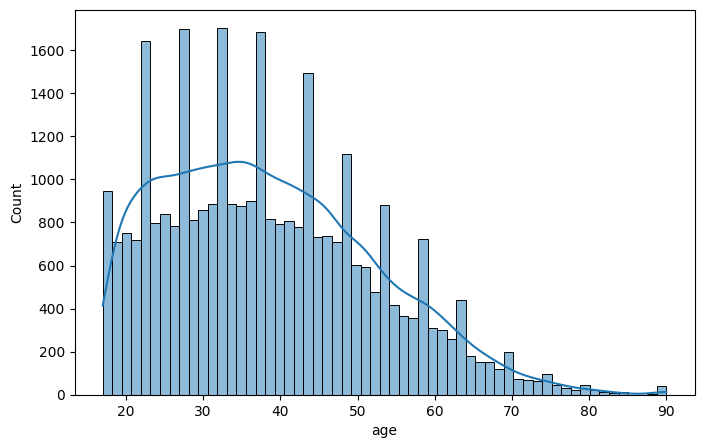

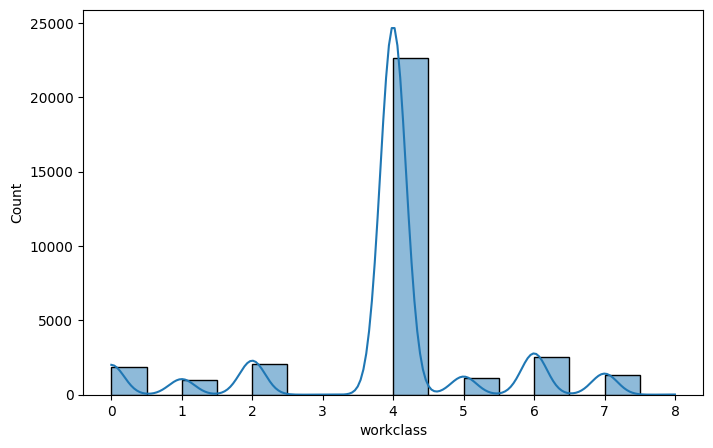

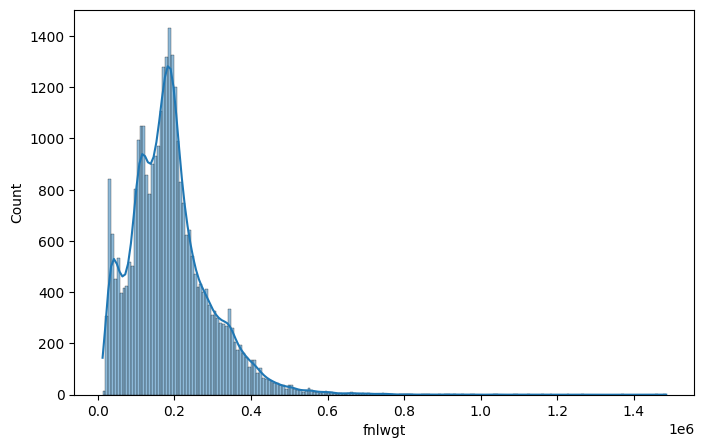

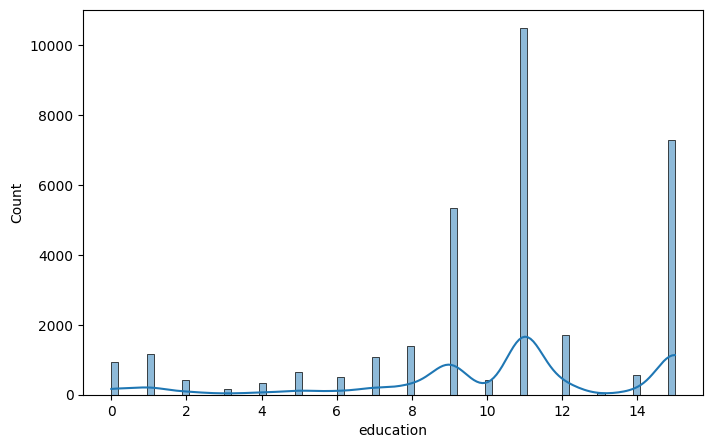

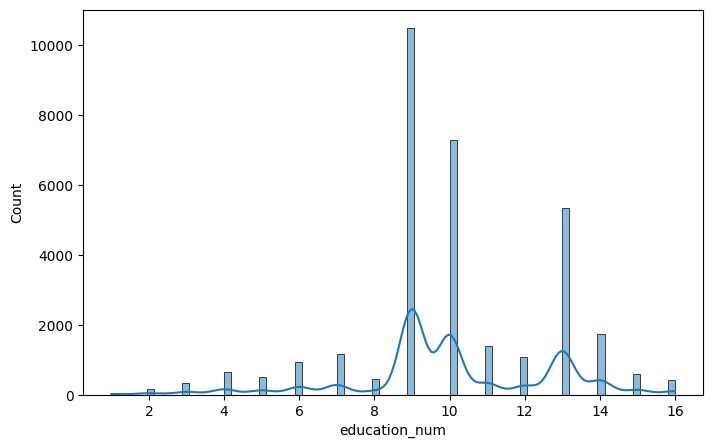

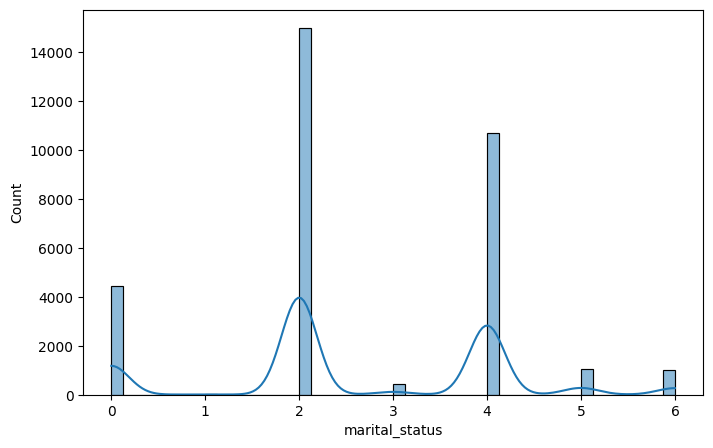

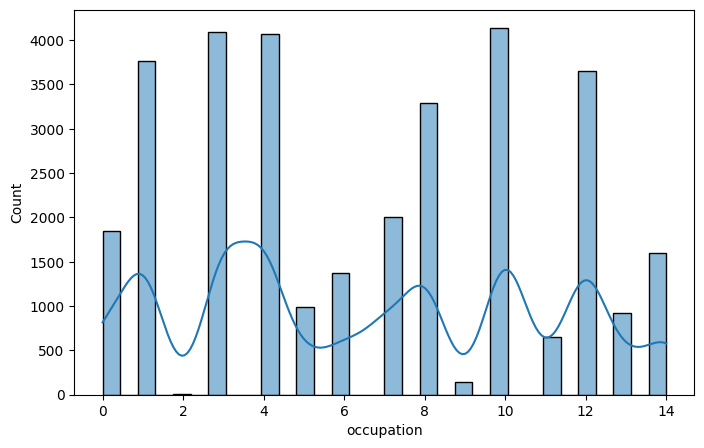

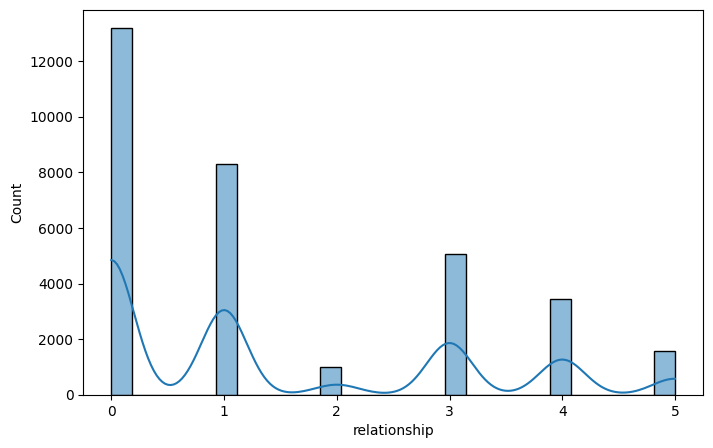

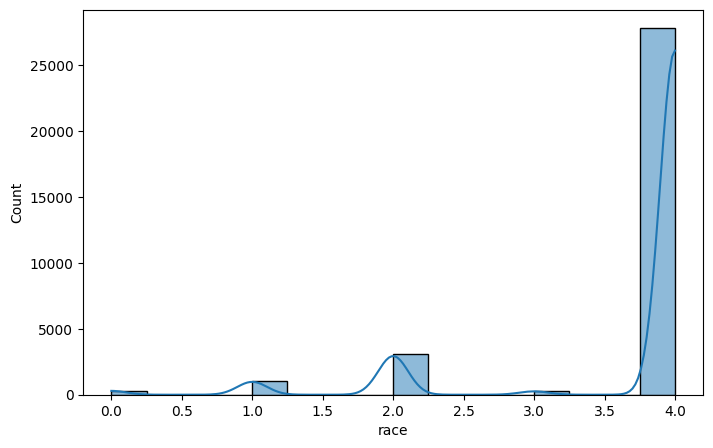

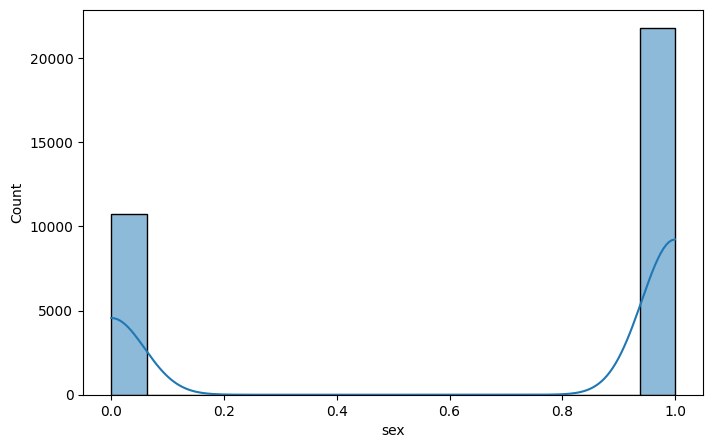

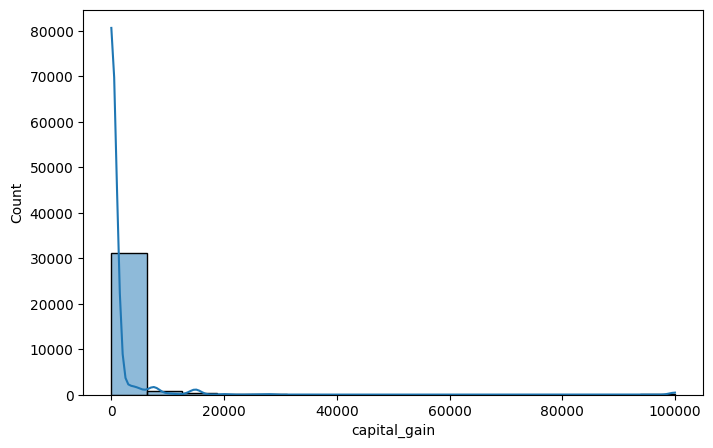

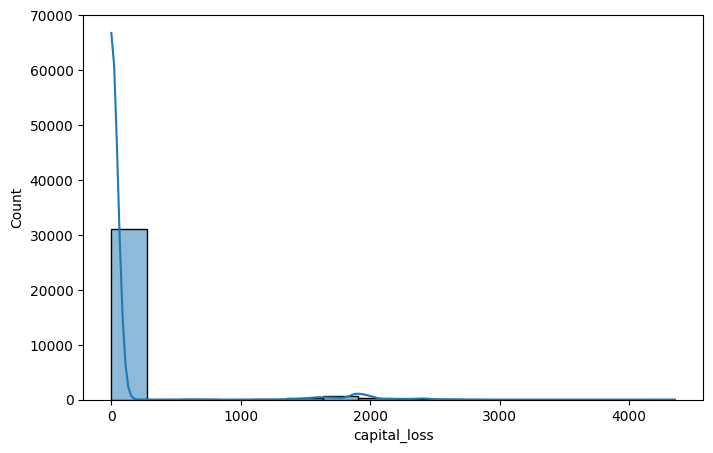

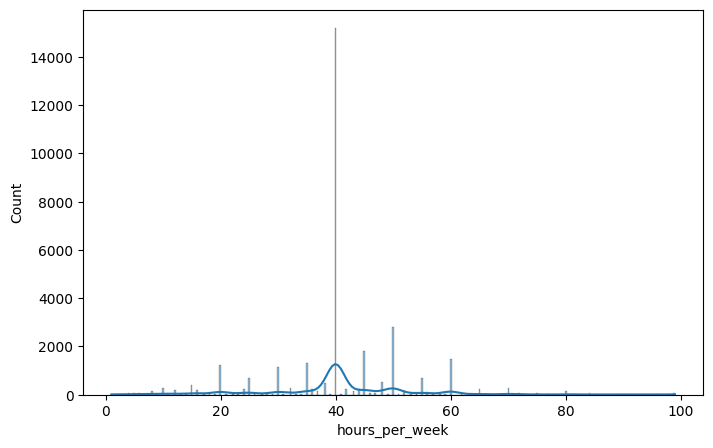

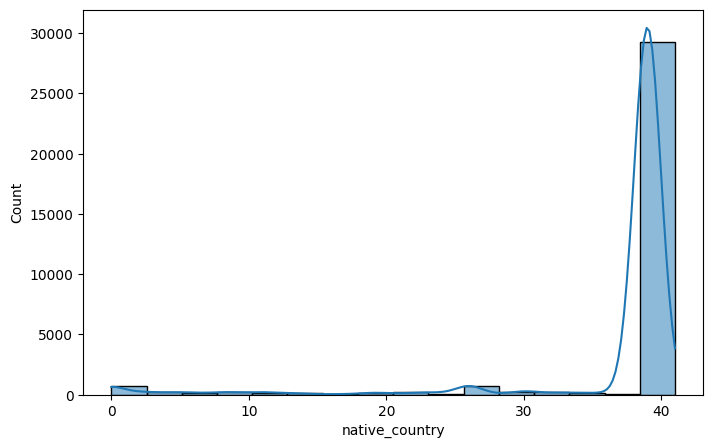

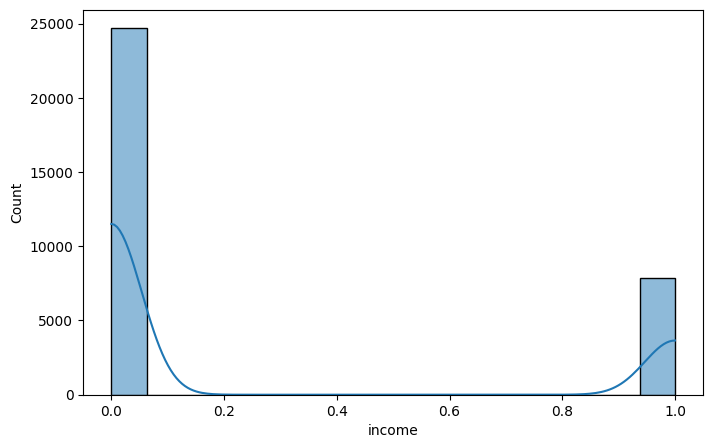

In [30]:
num_col=data1.select_dtypes(include=np.number).columns
for col in num_col:
  plt.figure(figsize=(8,5))
  sns.histplot(data1[col],kde=True)

In [31]:
#applying on capital gain and capiital loss which are highly skewed
#Applying a log transformation to these columns can help to:
'''
Reduce the impact of extreme values (outliers).
Make the distribution more symmetrical, which can improve the performance of some models.
Linearize relationships between variables in regression analysis.
'''

data1['log_capital_gain']=np.log(data1['capital_gain'])
data1.head()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,7.684324
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,-inf
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,-inf
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,-inf
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,-inf


**Proposed New Feature 1: Hours_per_Week_Category**

Rationale: Grouping working hours into categories can help capture potential non-linear relationships between hours worked and income. For instance, working more than a standard full-time might have a different impact on income than simply increasing hours within the full-time range.

In [32]:
# Create the Hours_per_Week_Category feature
bins = [0, 20, 40, 60, 1000]
labels = ['Part-time', 'Full-time', 'Overtime', 'Very High Hours']
data['Hours_per_Week_Category'] = pd.cut(data['hours_per_week'], bins=bins, labels=labels, right=False)

# Display the value counts for the new feature
display(data['Hours_per_Week_Category'].value_counts())

,count
Hours_per_Week_Category,
Part-time,9540
Full-time,0
Overtime,0
Very High Hours,0


In [33]:
# Create the Education_and_Occupation feature by combining the 'education' and 'occupation' columns

data1['Education_and_Occupation'] = data1['education'].astype(str) + '_' + data1['occupation'].astype(str)

# Display the value counts for the new feature (showing the top combinations)
display(data1['Education_and_Occupation'].value_counts().head())

,count
Education_and_Occupation,
11_3,1920
9_10,1494
9_4,1369
11_1,1365
11_8,1279
